# 🔍 Collaborative Filtering with SVD for Recommendation Systems

## 📝 Step 1: Load the Dataset

In [3]:
import pandas as pd
import numpy as np

# Load the dataset
anime_df = pd.read_csv("anime.csv")

# Create a user_id column by assigning random values between 1 and 12295
anime_df['user_id'] = np.random.randint(1, 12296, size=len(anime_df))

# Check the first few rows of the dataframe to verify
print(anime_df.head())


   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  user_id  
0   200630      279  
1   793665    11433  
2   114262    10184  
3   673572     8858  
4   151266     2732  


## 🧹 Step 2: Prepare Data for the Model

In [6]:
from surprise import Reader, Dataset

# Use 'anime_df' instead of 'ratings_df'
# We are assuming columns 'user_id', 'anime_id', and 'rating' are now available in anime_df
reader = Reader(rating_scale=(anime_df['rating'].min(), anime_df['rating'].max()))

# Load the data into Surprise's dataset format
data = Dataset.load_from_df(anime_df[['user_id', 'anime_id', 'rating']], reader)

# Check the number of ratings
print(f"Number of ratings: {len(anime_df)}")



Number of ratings: 12294


## 🔍 Step 3: Split the Data

In [11]:
from surprise.model_selection import train_test_split

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Check the number of ratings in the training and testing sets
print(f"Number of ratings in the training set: {trainset.n_ratings}")
print(f"Number of ratings in the test set: {len(testset)}")



Number of ratings in the training set: 9835
Number of ratings in the test set: 2459


## 🔧 Step 4: Choose a Collaborative Filtering Algorithm

In [14]:
from surprise import SVD

# Initialize the SVD (Singular Value Decomposition) algorithm
svd = SVD()

# Train the algorithm on the training set
svd.fit(trainset)



## 🧪 Step 5: Evaluate the Model

In [17]:
from surprise import accuracy

# Use the trained model to predict ratings on the test set
predictions = svd.test(testset)

# Calculate RMSE (Root Mean Squared Error) to evaluate the performance
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")



RMSE: nan
RMSE: nan


## 💡 Step 6: Make Predictions and Get Recommendations

In [20]:
# Get the top 10 recommendations for each user
def get_top_n(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    # Sort the predictions for each user and get the top n
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

top_n = get_top_n(predictions, n=10)

# Display recommendations for each user
for uid, user_ratings in top_n.items():
    print(f'\nUser {uid} recommendations:')
    for (iid, est) in user_ratings:
        print(f'  Anime ID: {iid}, Estimated Rating: {est}')



User 5201 recommendations:
  Anime ID: 21473, Estimated Rating: 10.0

User 8348 recommendations:
  Anime ID: 1782, Estimated Rating: 10.0

User 10177 recommendations:
  Anime ID: 5136, Estimated Rating: 10.0

User 2383 recommendations:
  Anime ID: 21119, Estimated Rating: 10.0

User 1926 recommendations:
  Anime ID: 27573, Estimated Rating: 10.0
  Anime ID: 6511, Estimated Rating: 10.0

User 598 recommendations:
  Anime ID: 8155, Estimated Rating: 10.0

User 5197 recommendations:
  Anime ID: 15793, Estimated Rating: 10.0

User 12235 recommendations:
  Anime ID: 31361, Estimated Rating: 10.0

User 1144 recommendations:
  Anime ID: 13161, Estimated Rating: 10.0

User 3489 recommendations:
  Anime ID: 1884, Estimated Rating: 10.0

User 11333 recommendations:
  Anime ID: 20913, Estimated Rating: 10.0

User 4099 recommendations:
  Anime ID: 11869, Estimated Rating: 10.0

User 3329 recommendations:
  Anime ID: 18301, Estimated Rating: 10.0
  Anime ID: 31534, Estimated Rating: 10.0

User 117

## 📈 Step 7: Visualize the Top 10 Recommendations

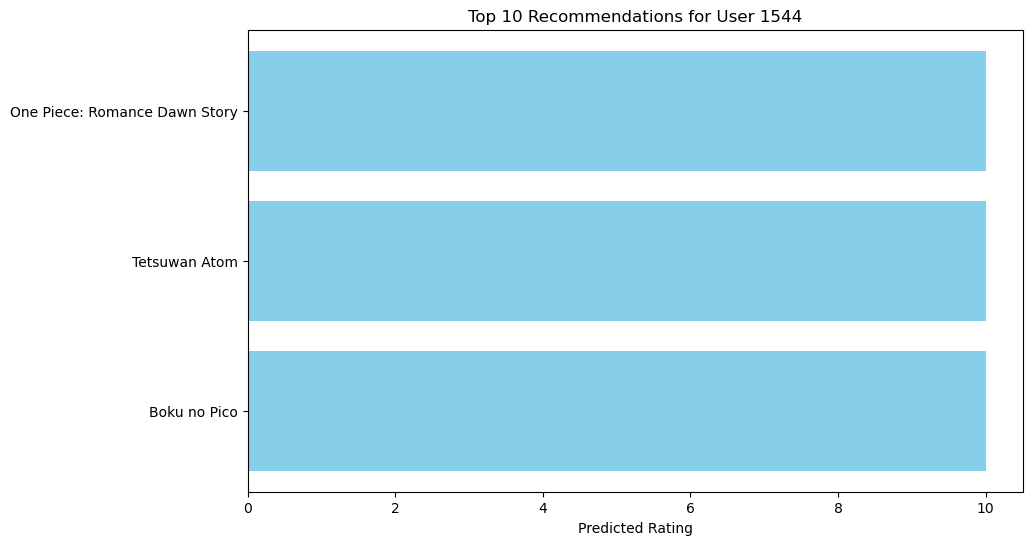

In [55]:
import matplotlib.pyplot as plt

# Example: Get recommendations for a specific user 
user_id = 1544
top_user_ratings = top_n.get(user_id, [])

# Get the anime names and ratings for plotting
top_anime_ids = [anime[0] for anime in top_user_ratings]
top_ratings = [anime[1] for anime in top_user_ratings]

# Get the names from anime_df using anime_id
top_animes = anime_df[anime_df['anime_id'].isin(top_anime_ids)]
top_anime_names = top_animes['name'].values

# Create the bar plot for the recommendations
plt.figure(figsize=(10, 6))
plt.barh(top_anime_names, top_ratings, color='skyblue')
plt.xlabel('Predicted Rating')
plt.title(f'Top 10 Recommendations for User {user_id}')
plt.gca().invert_yaxis()
plt.show()
